<a href="https://colab.research.google.com/github/minjaecd123/study/blob/master/20250314_ran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import json

# 파일 로드 (JSON Lines 지원)
file_path = "/content/drive/MyDrive/syon/Data/merge_trends_weather_long.jsonl"
df = pd.read_json(file_path, lines=True)  # 🔹 lines=True 옵션 추가

# 날짜 변형 (연, 월, 일 추출)
df['Year'] = df['Date'] // 10000
df['Month'] = (df['Date'] % 10000) // 100
df['Day'] = df['Date'] % 100

# 이상치 처리 (Precipitation의 -9.0을 NaN으로 변경 후 평균값으로 대체)
df['Precipitation'] = df['Precipitation'].replace(-9.0, None)
df['Precipitation'].fillna(df['Precipitation'].mean(), inplace=True)

# 범주형 데이터(Label Encoding)
le_group = LabelEncoder()
df['GroupName_Label'] = le_group.fit_transform(df['GroupName'])

le_gender = LabelEncoder()
df['Gender_Label'] = le_gender.fit_transform(df['Gender'])

# 입력(X)과 출력(y) 정의
X = df.drop(columns=['GroupName', 'Gender', 'GroupName_Label'])
y = df['GroupName_Label']

# 날씨 관련 특성(Temperature, Humidity, Precipitation) 제거
X_no_weather = X.drop(columns=['Temperature', 'Humidity', 'Precipitation'])

# 학습/테스트 데이터 분할 (80% 학습, 20% 테스트)
X_train_nw, X_test_nw, y_train_nw, y_test_nw = train_test_split(X_no_weather, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model_nw = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_nw.fit(X_train_nw, y_train_nw)

# 예측 및 정확도 평가
y_pred_nw = rf_model_nw.predict(X_test_nw)
accuracy_nw = accuracy_score(y_test_nw, y_pred_nw)

# 결과 JSON 저장
result = {"accuracy": accuracy_nw}

# JSON 파일로 저장
result_path = "/content/drive/MyDrive/project/random_forest_result.json"
with open(result_path, "w") as f:
    json.dump(result, f)

print(f"랜덤 포레스트 정확도: {accuracy_nw:.4f}")
print(f"결과가 JSON 파일로 저장되었습니다: {result_path}")


<ipython-input-1-1582f8cb66d0>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precipitation'].fillna(df['Precipitation'].mean(), inplace=True)
<ipython-input-1-1582f8cb66d0>:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Precipitation'].fillna(df['Precipitation'].mean(), inplace=True)


랜덤 포레스트 정확도: 0.8272
결과가 JSON 파일로 저장되었습니다: /content/drive/MyDrive/project/random_forest_result.json


In [6]:
# JSON 파일로 저장
result_path = "/content/drive/MyDrive/project/random_forest_result.json"
with open(result_path, "w") as f:
    json.dump(result, f)

print(f"랜덤 포레스트 정확도: {accuracy_nw:.4f}")
print(f"결과가 JSON 파일로 저장되었습니다: {result_path}")

랜덤 포레스트 정확도: 0.8272
결과가 JSON 파일로 저장되었습니다: /content/drive/MyDrive/project/random_forest_result.json


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


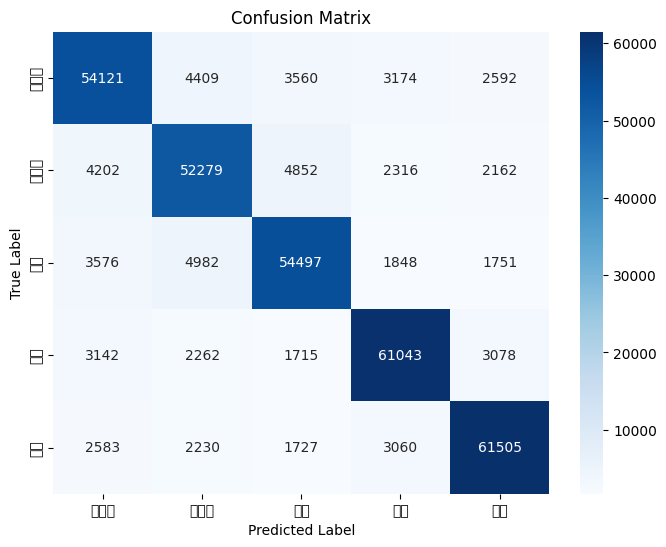

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 혼동 행렬 계산
cm = confusion_matrix(y_test_nw, y_pred_nw)

# 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le_group.classes_, yticklabels=le_group.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [4]:
from sklearn.metrics import classification_report

# 분류 성능 평가
report = classification_report(y_test_nw, y_pred_nw, target_names=le_group.classes_)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

         간편식       0.80      0.80      0.80     67856
         건강식       0.79      0.79      0.79     65811
          스낵       0.82      0.82      0.82     66654
          안주       0.85      0.86      0.86     71240
          집밥       0.87      0.86      0.87     71105

    accuracy                           0.83    342666
   macro avg       0.83      0.83      0.83    342666
weighted avg       0.83      0.83      0.83    342666



/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


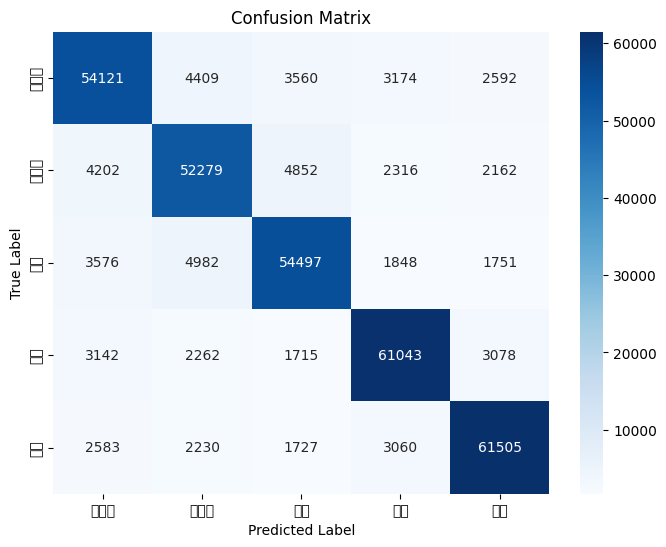

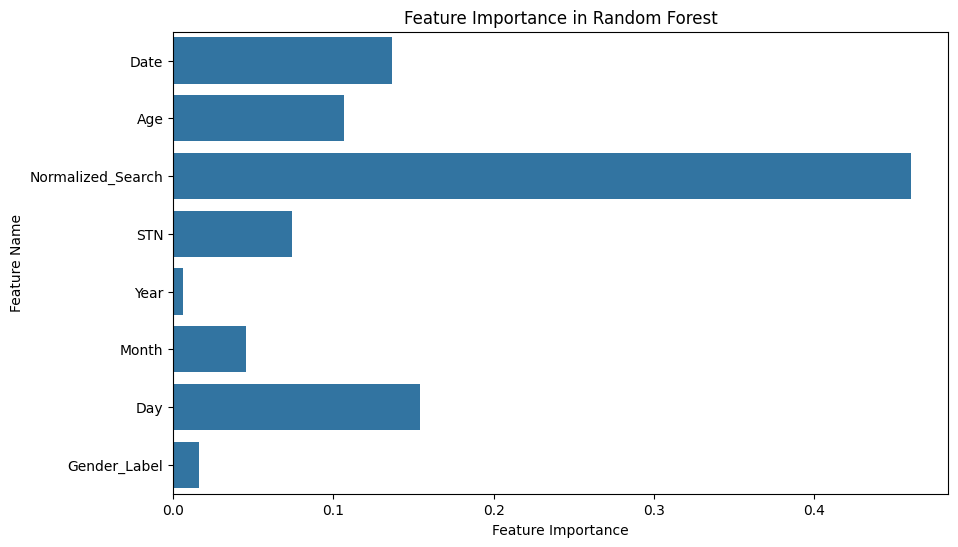

Classification Report:
               precision    recall  f1-score   support

         간편식       0.80      0.80      0.80     67856
         건강식       0.79      0.79      0.79     65811
          스낵       0.82      0.82      0.82     66654
          안주       0.85      0.86      0.86     71240
          집밥       0.87      0.86      0.87     71105

    accuracy                           0.83    342666
   macro avg       0.83      0.83      0.83    342666
weighted avg       0.83      0.83      0.83    342666



In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# 1️⃣ 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test_nw, y_pred_nw)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le_group.classes_, yticklabels=le_group.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 2️⃣ 특성 중요도 (Feature Importance)
importances = rf_model_nw.feature_importances_
feature_names = X_no_weather.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Random Forest")
plt.show()

# 3️⃣ 분류 성능 평가 (Classification Report)
report = classification_report(y_test_nw, y_pred_nw, target_names=le_group.classes_)
print("Classification Report:\n", report)
